In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
keras.backend.backendend()

'tensorflow'

# Import Dataset

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 48s 4us/step


# Explore Data

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [7]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

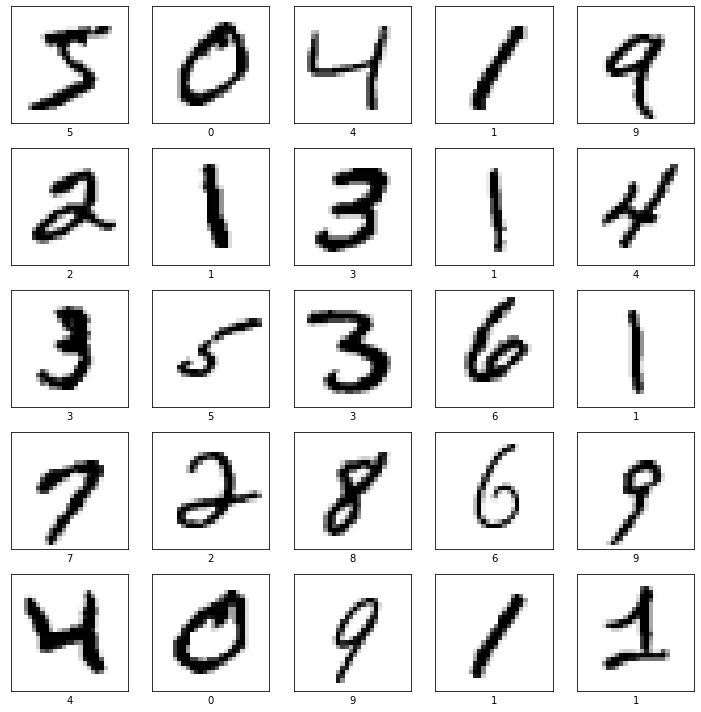

In [20]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.grid(False)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.tight_layout()

# Build model & Set up layers

In [21]:
from keras.models import Sequential
from keras.layers import Flatten, Activation, Dense

In [23]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss="sparse_categorical_crossentropy",          
              optimizer="adam",
              metrics=["accuracy"])

In [25]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 141us/step - loss: 2.3235 - accuracy: 0.8602
Epoch 2/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.3573 - accuracy: 0.9139
Epoch 3/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.2704 - accuracy: 0.9297
Epoch 4/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.2467 - accuracy: 0.9368
Epoch 5/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.2279 - accuracy: 0.9433
Epoch 6/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.2103 - accuracy: 0.9473
Epoch 7/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.2033 - accuracy: 0.9497
Epoch 8/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.1891 - accuracy: 0.9536
Epoch 9/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.1829 - accuracy: 0.9545
Epoch 10/10
60000/60000 [=====================

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: {}'.format(test_acc))

10000/10000 [==============================] - 1s 84us/step
Test accuracy: 0.9473000168800354


In [27]:
yp = model.predict(x_test)

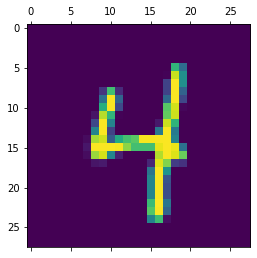

In [28]:
plt.matshow(x_test[19])

In [29]:
y_test[19]

4

In [30]:
np.argmax(yp[19])

4

# Verify Predication 

In [66]:
def plt_img(i):
    plt.grid(False)
    plt.xticks([]) 
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted = np.argmax(yp[i])
    if predicted == y_test[i]:
        color = 'blue'
    else:
        color = 'red'
    acc = np.max(yp[i])
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted], 100*acc, y_test[i]), color=color)

def plt_value_array(i):
    plt.grid(False)
    plt.xticks(range(10)) 
    plt.yticks([])
    bar = plt.bar(range(10), yp[i], color="#777777")
    predicted = np.argmax(yp[i])
    plt.ylim([0, 1])
    t = y_test[i]
    bar[predicted].set_color('red')
    bar[t].set_color('blue')
    

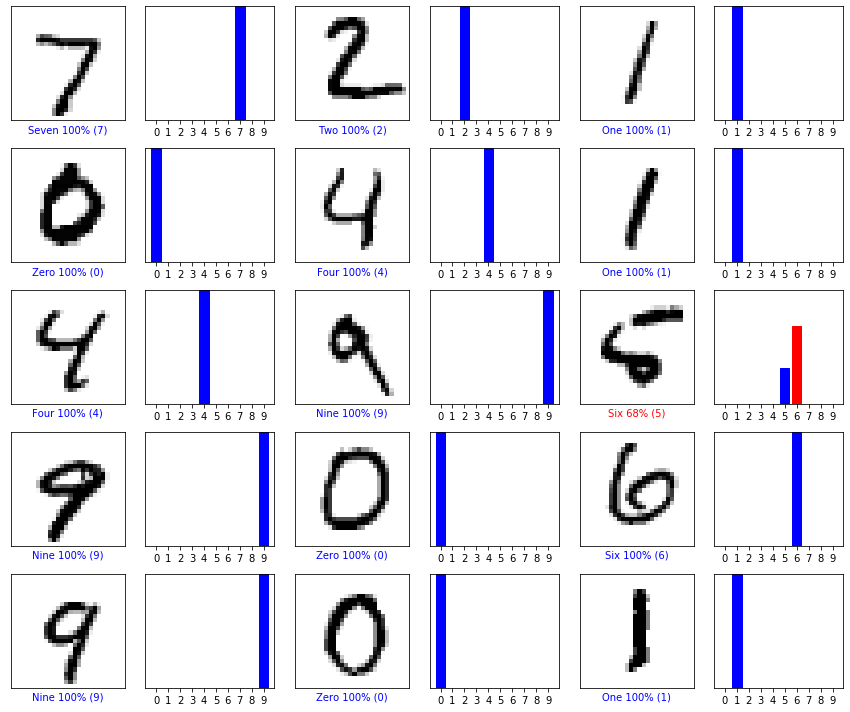

In [67]:
rows = 5
cols = 3
images = rows*cols
plt.figure(figsize=(2*2*cols, 2*rows))
for i in range(rows*cols):
    plt.subplot(rows, 2*cols, 2*i+1)
    plt_img(i)
    plt.subplot(rows, 2*cols, 2*i+2)
    plt_value_array(i)
plt.tight_layout()
